<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Préparation des données</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 25px; color:rgb(47, 99, 220)">1- <u>reduction du nombre de variable de base_edu </u></h1>
    

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import os


print(os.getcwd())  # Répertoire actuel
#repertoire de la bd
#url="/home/onyxia/work/Projet_Statistique/data/base_Edu.parquet"
url="C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_Edu (1).parquet"
base_Edu=pd.read_parquet(url)
base_Edu1=base_Edu
base_Edu.head()

c:\Users\lisaw\Desktop\ENSAE\2AD\Projet-stat-ap\Projet_Statistique\Lisa


,unique_learner_id,days_between_signup_and_first_activity,days_between_order_and_first_activity,first_theory_activity_date,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,weekly_study_objective,...,avg_correct_answer_rate_last_7d_before_theory_exam,bool_last_activity_exam_success,nb_weeks_weekly_study_objective_reached,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
0,8419571457653010970,0,0,2019-11-06 11:48:23,69,0,0,0,9,<NA>,...,NaN,<NA>,0,0,0,1,0.0,0.0,0.0,100.0
1,8146721487194078646,4,-21,2019-12-25 12:46:52,187,0,0,0,120,<NA>,...,NaN,<NA>,0,0,0,1,0.0,0.0,0.0,100.0
2,-3485592876691787799,0,0,2023-05-20 17:36:26,509,0,0,0,54,120,...,NaN,<NA>,0,1,0,0,0.0,100.0,0.0,0.0
3,-3219165913854507531,0,0,2020-02-15 22:04:04,16,0,33,0,33,<NA>,...,0.775,0,0,0,0,1,0.0,0.0,0.0,100.0
4,-4837902186147543536,0,1,2024-01-04 14:45:07,213,0,0,0,153,120,...,NaN,<NA>,0,1,0,0,0.0,100.0,0.0,0.0


In [170]:
columns_edu=base_Edu.columns
print(base_Edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 470 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(65), boolean(254), datetime64[us](1), float64(150)
memory usage: 438.9 MB
None


La base de données compte donc 477 variables dont 72 de type Int, 254 de type boolean, 1 de type datetime et 150 de type float soit au total 254 variables qualitatives (**boolean**) et 221 variables quantitatives(**float + int** en excluant les identifiants) sans oublier la variable de type **datetime**.

Nous commencons par épurer la base données avant de passer à la réduction de dimension. On s'intéressera essentiellement ici aux données erronnées et valeurs manquantes. La nature de nos variables c'est à dire leur sens laisse supposer des valeurs négatives comme potentielles valeurs erronées pour nos variables numérique (int + float+ datetime). Aucune opération ne sera faite au niveau des booléen concernant les données erronées puisque leur type impose déjà les valeurs possibles. 

Interessons nous maintenant aux valeurs manquantes. 

In [171]:
missing_value=(base_Edu.isnull().sum()/len(base_Edu))
missing_value[missing_value>0]
missing_value[missing_value>0].describe()

count    404.000000
mean       0.744336
std        0.278540
min        0.048770
25%        0.664535
50%        0.843895
75%        0.919200
max        1.000000
dtype: float64

La base de données comporte donc 404 variables avec valeurs manquantes sur le total des 476 variables de la base ce qui n'est pas du tout négligeable. Voyons combien de valeurs manquantes at-on par type de variables. 

In [172]:
print(base_Edu.select_dtypes("int").isnull().any().sum()," variable de type int ont des valeurs manquantes")
print(base_Edu.select_dtypes("float").isnull().any().sum()," variable de type float ont des valeurs manquantes")
print(base_Edu.select_dtypes("boolean").isnull().any().sum()," variable de type boolean ont des valeurs manquantes")
print(base_Edu.select_dtypes("datetime").isnull().any().sum()," variable de type datetime ont des valeurs manquantes")

48  variable de type int ont des valeurs manquantes
103  variable de type float ont des valeurs manquantes
253  variable de type boolean ont des valeurs manquantes
0  variable de type datetime ont des valeurs manquantes


La seule variable de type datetime n'a donc pas de valeurs manquantes.  Analysons de plus près les proportions de valeurs manquantes des autres types

In [173]:
miss_bool=base_Edu.select_dtypes("boolean").isnull().sum()/len(base_Edu)
miss_bool[miss_bool>0].describe()

count    253.000000
mean       0.904117
std        0.071375
min        0.694955
25%        0.839120
50%        0.884215
75%        1.000000
max        1.000000
dtype: float64

Les variables de type boolean comporte pratiquement tous assez de valeurs manquantes avec un minimum de 69% et un maximum de 100% du total des observations

Les valeurs manquantes de la base ne sont pas complètement aléatoires. Elles ne sont pas pour la plupart le fruit d'une mauvaise collecte de données. La présence de valeurs manquantes dans cette base est due à diverses raisons notamment le fait que plusieurs individus de la base n'ont pas encore passé d'examen pour le permis. Plusieurs questions(variables) n'ont de sens que dans le cas où le premier examen est passé. Il y a donc une part d'information apporté par ces valeurs manquantes que nous devons inclure dans nos analyses. Pour les variables booléenne, nous pouvons régler ce prblème c'est à dire prendre en compte l'information apportée par ces valeurs manquantes en transformant les variables booléennes en variable catégorielles en considérant les valeurs manquantes comme une catégorie(True=1,False=0 et NA=2).

In [174]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs booléennes et <NA>
    return col.map(mapping)
colboo=base_Edu.select_dtypes("boolean").columns
for col in colboo:
    base_Edu[col] = encode_column_with_na(base_Edu[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories


Passons maintenant aux variables quantitatives (int+float)

In [175]:
miss_quant=base_Edu.select_dtypes(include=["int","float"]).isnull().sum()/len(base_Edu)
miss_quant[miss_quant>0].describe()

count    151.000000
mean       0.476624
std        0.290993
min        0.048770
25%        0.183470
50%        0.482500
75%        0.737020
max        0.940580
dtype: float64

Pour les variables quantitatives, la distribution des valeurs manquantes est plus étendue. On enregistre 151 variables qualitatives avec valeurs manquantes. On a un minimum de 4% et un maximum de 94% de valeurs manquantes par rapport au total d'observation(nous rappelons 200000 obervations). La nature des variables et la distribution des valeurs manquantes dans ce cas ne facilite pas la capture de l'information apportée par la présence de ces valeurs manquantes. On pourrait opter pour une imputation par KNN ou par imputation itérative (MICE) mais cela risque de modifier et significativement les corrélations existant déjà entre les variables introduisant ainsi un important biais et au vue de la taille de l'echantillon, cela demanderait un temps d'excution énorme. On choisit ici donc de procéder à une imputation par la médiane après suppression des variables avant un taux élevé de valeurs manquantes pour minimiser le biais. Cela permettra de ne pas trop distordre les distributions existentes.

In [176]:
miss_quant[miss_quant<=0.20].describe()

count    111.000000
mean       0.058967
std        0.075779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.126815
max        0.195385
dtype: float64

Nous choisissons le seuil de 20% de valeurs manquantes. Ce seuil nous parait raisonnable puisqu'il est relativement faible et n'entraine pas la suppression d'un grand nombre de variables quantitatives (118 sont conservées sur un total de 151)

In [177]:
#suppression des variables avec plus de 20% de valeurs manquantes
base_Edu=base_Edu.drop(columns=miss_quant[miss_quant>0.20].index)
#Imputation par la médiane
col=base_Edu.select_dtypes(exclude='category').columns
base_Edu[col] = base_Edu[col].fillna(base_Edu[col].median())

In [178]:
columns_delete= list(set(base_Edu1.columns) - set(base_Edu.columns))
len(columns_delete)

104

In [179]:
base_Edu.shape

(200000, 366)

Plus aucune valeur manquante. La base de données enfin prête, on peut passer aux opérations de réduction de dimension

## ACP

Pour l'ACP, Nous allons tout dabord nous restreindre à un echantillon de la base pour réduire le temps de calcul, ensuite nous allons sélectionner les variables continues (int + float) et supprimer la variable des identifiants.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [13]:
data=base_Edu
data=data.select_dtypes(include=["int","float"])
data=data.drop(["unique_learner_id"], axis=1)

In [42]:
data.iloc[1:100,:].head()

,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,percentage_activities_2_3_4h_week,percentage_activities_5_6_7h_week,percentage_activities_23_0_1h_week,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
1,0,0,27,0,0,0,11,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
2,787,788,295,0,0,0,73,0.054795,0.109589,0.260274,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0
3,615,616,138,0,0,0,75,0.160000,0.133333,0.000000,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
4,169,170,554,0,0,0,41,0.000000,0.024390,0.000000,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0
5,2,0,323,0,0,0,135,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0


Par la suite, nous allons standardiser les variables afin de faire qu'elles aient toutes la même échelle car l'ACP dépend fortement de l'échelle des variables.

In [13]:
scaler =StandardScaler()
X_scaled =scaler.fit_transform(data)

NameError: name 'data' is not defined

### Choix du nombre de composantes principales

#### **Règle du coude**

Text(0.5, 0, 'Composantes principales')

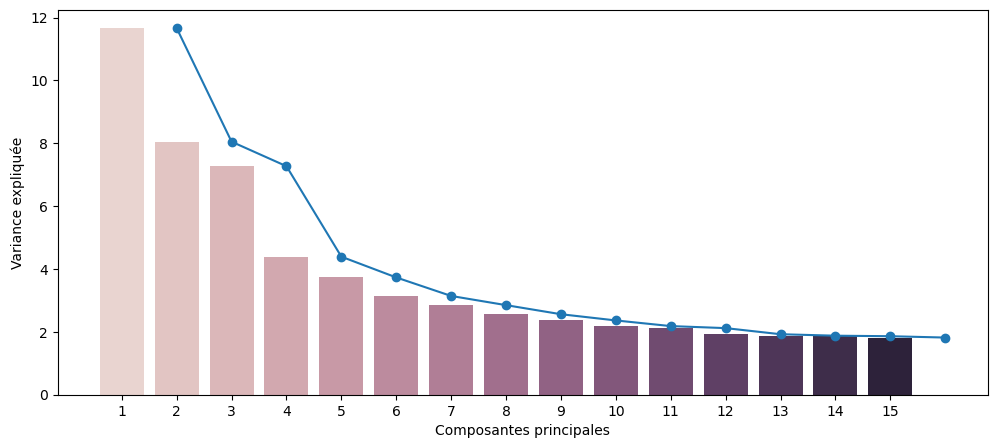

In [80]:
plt.figure(figsize=(12, 5))
pca=PCA(n_components=15)
pca.fit(X_scaled)
sns.barplot(x= range(1,16) , y=pca.explained_variance_ratio_*100, hue=np.arange(1,16), legend=False)
plt.plot(range(1,16), pca.explained_variance_ratio_*100, marker='o')
plt.ylabel("Variance expliquée")
plt.xlabel("Composantes principales")

On observe de ce graphique qu'il y a deux coudes possibles, l'un à la deuxième composante et l'autre à la sixième composante. La première composante principale explique 11,66% de la variance totale, la deuxième en explique 8,05%, la troisième 7,27%, et à partir de la sixième composante principale, le pourcentage de variable expliquée devient inférieur à 3%. Les facteurs restants ont donc un apport d'information négligeable.

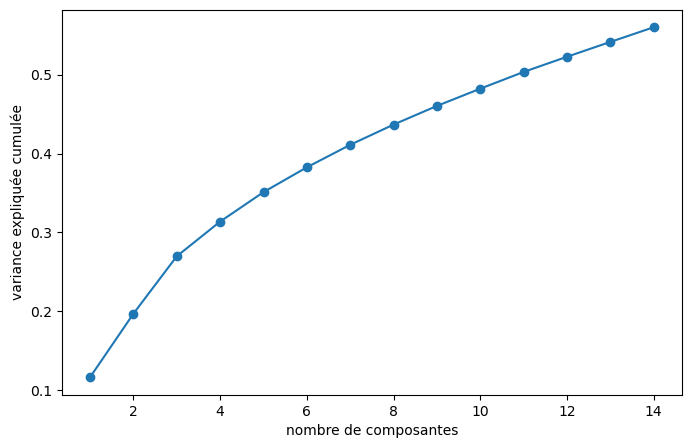

In [17]:
explained_variances=[]
for n in range(1,15):
    pca =PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,5))
plt.plot(range(1,15), explained_variances, marker='o')
plt.xlabel("nombre de composantes")
plt.ylabel("variance expliquée cumulée")
plt.show()

Le graphique des variances expliquées cumulées montre que les 6 premières composantes principales expliquent environ 39% de l'information. Considerer deux composantes principales n'est pas une bonne idée car on perdrais le gain d'information substanciel qu'apporte les 4 composantes principales suivantes.


#### **Test des « bâtons brisés »**

Ce test est du à Frontier (1976) et Legendre-Legendre (1983). Il repose sur l’idée que si l’inertie totale était dispatchée aléatoirement sur les axes, la distribution des valeurs propres suivrait la loi des 
« bâtons brisés » (broken-stick). La valeur critique pour le choix des composantes principales s'écrit comme suit:
$$ b_{k} = \sum_{i=k}^{p} \frac 1 {i}$$

où p représente le nombre de variables.

In [18]:
baton_coef=[]
for i in np.arange(1,16):
    n=0
    for j in range(i,117):
        n=n+(1/j)
    baton_coef.append(n)


In [32]:
data1=pd.DataFrame(data=pca.explained_variance_, columns=["eigen_values"])
data1["b_k"]=baton_coef
data1.index=["PC{}".format(i) for i in np.arange(1,16)]
data1

,eigen_values,b_k
PC1,11.433010,5.335110
PC2,7.889850,4.335110
PC3,7.125282,3.835110
PC4,4.303661,3.501777
PC5,3.656646,3.251777
PC6,3.079446,3.051777
PC7,2.793093,2.885110
PC8,2.510063,2.742253
PC9,2.316068,2.617253
PC10,2.140029,2.506142


Avec ce test on retient bien 6 composantes principales, car jusqu'a la sixième composante principale, la valeur propre de chaque composante est bien supérieur au seuil calculé.

Nous retiendrons donc 6 composantes principales dans la suite.

### Entrainement du modèle et interprétation des coefficients

In [66]:
# training the model with 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)
print("Explain variance for each component :",pca.explained_variance_ratio_)
print("cumulated variance :",pca.explained_variance_ratio_.sum())

Explain variance for each component : [0.11666279 0.08050827 0.0727066  0.04391469 0.03731253 0.03142276]
cumulated variance : 0.3825276432979798


In [34]:
# coefficients of the principal components 
print("Composantes principales (coefficients) :")
table_coef=pd.DataFrame(pca.components_, columns=data.select_dtypes(exclude='category').columns)
table_coef.index=["PC{}".format(i+1) for i in np.arange(0,6)]
table_coef

Composantes principales (coefficients) :


,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,percentage_activities_2_3_4h_week,percentage_activities_5_6_7h_week,percentage_activities_23_0_1h_week,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
PC1,0.066023,0.075380,-0.004304,-2.775558e-17,0.117614,0.108084,0.151237,-0.005015,0.010848,0.006412,...,0.124556,0.124960,0.125143,0.096558,0.017135,-0.004208,0.089261,0.075793,0.014699,-0.085941
PC2,-0.008065,-0.011528,0.001866,-5.551115e-17,0.064442,0.019720,0.024426,0.005472,-0.002838,0.010552,...,0.309994,0.305893,0.300151,0.033900,0.009574,0.012058,0.210167,-0.048970,0.004089,0.027051
PC3,0.011085,0.024568,-0.029454,2.775558e-17,0.054100,-0.053615,0.048469,-0.009290,0.005750,-0.014141,...,-0.038576,-0.037714,-0.036979,-0.021818,-0.007792,0.092365,-0.025102,-0.109213,-0.007508,0.111340
PC4,0.012075,0.023671,0.102459,5.551115e-17,0.172124,0.000509,0.288040,0.011691,0.003262,0.014421,...,-0.053972,-0.051355,-0.047792,0.081472,0.001146,0.133412,-0.050539,-0.034476,-0.001302,0.039099
PC5,0.096317,0.049701,0.418382,5.551115e-17,0.002792,-0.017294,0.017500,0.011576,0.012686,0.004933,...,-0.000584,-0.000301,0.000041,0.023312,0.006522,0.019306,-0.008350,0.023635,0.005007,-0.022552
PC6,0.182581,0.171615,-0.019994,-5.551115e-17,-0.034044,-0.000467,0.027862,0.024514,0.005893,0.064625,...,-0.009708,-0.008219,-0.006514,0.060201,0.015828,-0.188849,0.006282,0.300840,0.016464,-0.301232


In [68]:
# cosinus carré, peut-être à supprimer
cos_squared=np.square(pca.components_)
df_cos_squared=pd.DataFrame(cos_squared, columns=data.columns)
df_cos_squared.index=["PC{}".format(i+1) for i in np.arange(0,6)]
df_cos_squared

,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,percentage_activities_2_3_4h_week,percentage_activities_5_6_7h_week,percentage_activities_23_0_1h_week,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
PC1,0.004359,0.005682,0.000019,7.703720e-34,0.013833,1.168220e-02,0.022873,0.000025,0.000118,0.000041,...,1.551412e-02,1.561502e-02,1.566082e-02,0.009323,0.000294,0.000018,0.007967,0.005745,0.000216,0.007386
PC2,0.000065,0.000133,0.000003,3.081488e-33,0.004153,3.888735e-04,0.000597,0.000030,0.000008,0.000111,...,9.609627e-02,9.357077e-02,9.009067e-02,0.001149,0.000092,0.000145,0.044170,0.002398,0.000017,0.000732
PC3,0.000123,0.000604,0.000868,7.703720e-34,0.002927,2.874515e-03,0.002349,0.000086,0.000033,0.000200,...,1.488141e-03,1.422311e-03,1.367417e-03,0.000476,0.000061,0.008531,0.000630,0.011928,0.000056,0.012397
PC4,0.000146,0.000560,0.010498,3.081488e-33,0.029627,2.591155e-07,0.082967,0.000137,0.000011,0.000208,...,2.912954e-03,2.637352e-03,2.284086e-03,0.006638,0.000001,0.017799,0.002554,0.001189,0.000002,0.001529
PC5,0.009277,0.002470,0.175044,3.081488e-33,0.000008,2.990705e-04,0.000306,0.000134,0.000161,0.000024,...,3.407887e-07,9.034439e-08,1.653873e-09,0.000543,0.000043,0.000373,0.000070,0.000559,0.000025,0.000509
PC6,0.033336,0.029452,0.000400,3.081488e-33,0.001159,2.177220e-07,0.000776,0.000601,0.000035,0.004176,...,9.425027e-05,6.755040e-05,4.242774e-05,0.003624,0.000251,0.035664,0.000039,0.090504,0.000271,0.090741


In [70]:
#Aucune des variables n'a un cosinus carré supérieur à 0,5, donc ces variables ne sont pas bien représenter dans l'hyperplan factoriel
df_cos_squared.sum()[df_cos_squared.sum()>=0.1]

days_between_first_and_last_activities           0.186831
theory_activities_total                          0.109868
autres_usagers_number_of_activities              0.102156
mecanique_equipements_number_of_activities       0.100760
notions_diverses_number_of_activities            0.105931
premiers_secours_number_of_activities            0.101542
prendre_quitter_vehicule_number_of_activities    0.104893
securite_number_of_activities                    0.101149
learning_duration_hours                          0.102401
n_activity_per_session_avg                       0.112729
minutes_between_sessions_max                     0.191900
minutes_between_sessions_avg                     0.167026
minutes_between_sessions_std                     0.143220
session_count                                    0.107436
nb_failed_series                                 0.103407
percentage_serie_theme                           0.106595
score_pct__standard_deviation                    0.115042
score_pct__var

In [67]:
# contributions of the principal components
loadings=pca.components_.T
eigenvalues=pca.explained_variance_
contributions=(loadings**2)*eigenvalues
#contrib_percent=contributions/eigenvalues*100
contrib_percent=contributions/(eigenvalues.sum())*100
contrib_df=pd.DataFrame(contrib_percent, columns=["PC{}".format(i+1) for i in np.arange(0,6)])
contrib_df.index=data.columns


In [68]:
contrib_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
days_between_signup_and_first_activity,1.329430e-01,1.368918e-03,2.335643e-03,1.673759e-03,9.048918e-02,2.738366e-01
days_between_order_and_first_activity,1.732939e-01,2.796750e-03,1.147270e-02,6.432332e-03,2.409466e-02,2.419320e-01
days_between_first_and_last_activities,5.648254e-04,7.329077e-05,1.648967e-02,1.205164e-01,1.707412e+00,3.283896e-03
chapter_before_success_count,2.349471e-32,6.485421e-32,1.464237e-32,3.537590e-32,3.005746e-32,2.531291e-32
serie_before_success_count,4.218814e-01,8.740119e-02,5.562899e-02,3.401181e-01,7.601261e-05,9.520390e-03


### Interprétation des composantes principales

In [74]:
contrib1=pd.DataFrame(data=contrib_df["PC1"].sort_values(ascending=False)[:16].values, columns=["contribution"]) 
contrib1.index=contrib_df["PC1"].sort_values(ascending=False)[:16].index
contrib1["coefficient"]=table_coef[contrib1.index].iloc[0]
contrib1

,contribution,coefficient
notions_diverses_number_of_activities,1.344225,0.209943
mecanique_equipements_number_of_activities,1.304631,0.206828
prendre_quitter_vehicule_number_of_activities,1.288815,0.205570
autres_usagers_number_of_activities,1.288610,0.205554
route_number_of_activities,1.269300,0.204008
securite_number_of_activities,1.264361,0.203611
premiers_secours_number_of_activities,1.257594,0.203065
environnement_number_of_activities,1.214696,0.199572
conducteur_number_of_activities,1.154733,0.194584
score_pct__quantile__q_0_4,0.999702,0.181051


Les variables qui contribuent le plus à la construction de la première composante principale sont des variables qui renseigne sur le nombre d'activité effectuer par thématique pour le permis de conduire (*notions_diverses_number_of_activities*, *mecanique_equipements_number_of_activities*,*securite_number_of_activities*, *route_number_of_activities*, *prendre_quitter_vehicule_number_of_activities*, *autres_usagers_number_of_activities*,etc.) et les statistiques qui résultent des scores en pourcentage obtenus aux différents examens notamment les quantiles d'ordre 1, 2, 3 et 4 (*score_pct__quantile__q_0_1*, *score_pct__quantile__q_0_2*, *score_pct__quantile__q_0_3*, *score_pct__quantile__q_0_4*), et .... Cet axe résume le signal et/ou la corrélation qui existe entre le nombre d'activités effectués par thématique et la distribution du score au différents examens. On pourrait donc dire qu'il traduit l'**efficacité** des étudiants.

De plus, en analysant les coefficients de ces variables, ont constate qu'elles sont toutes positifs. Ainsi, un individu ayant un coefficient élevé sur cet axe, fait beaucoup d'activité sur les différentes thématiques d'apprentissage et a des scores élevés aux différents examens, ce qui signifie qu'il comprend bien ce qu'il fait.

In [72]:
contrib2=pd.DataFrame(data=contrib_df["PC2"].sort_values(ascending=False)[:9].values, columns=["contribution"]) 
contrib2.index=contrib_df["PC2"].sort_values(ascending=False)[:9].index
contrib2["coefficient"]=table_coef[contrib2.index].iloc[1]
contrib2

,contribution,coefficient
nb_weeks_weekly_study_objective_reached_90pct,2.063731,0.313139
nb_weeks_weekly_study_objective_reached_85pct,2.052990,0.312323
nb_weeks_weekly_study_objective_reached_95pct,2.052586,0.312293
nb_weeks_weekly_study_objective_reached_99pct,2.034116,0.310884
nb_weeks_weekly_study_objective_reached,2.027262,0.310360
nb_weeks_weekly_study_objective_reached_80pct,2.022480,0.309994
nb_weeks_weekly_study_objective_reached_75pct,1.969327,0.305893
nb_weeks_weekly_study_objective_reached_70pct,1.896084,0.300151
pct_study_objective_reached,0.929620,0.210167


Les variables qui contribuent fortement à la deuxième composante principale sont d'une part les variables qui renseignent sur le nombre de week-end où les objectifs d'étude hebdomadaire ont atteint un pourcentage donnée (90%,85%,95%,99%,75%,etc) et d'autre part les variables qui donnent le pourcentage d'objectifs d'études atteint le week-end (*nb_weeks_weekly_study_objective_reached*) et en dehors (*pct_study_objective_reached*). On pourrait dire que cet axe capture principalement l'information sur **l'intensité du travail personnel des étudiants**. 

De plus, le coefficient de toutes les variables qui contribuent le plus à la formation de l'axe 2 sont positifs. Donc, les individus qui ont un coefficient élevé et positif sur cet axe (se trouvant à une extrémité de l'axe) sont beaucoup investit personnellement dans la formation.

In [76]:
contrib3=pd.DataFrame(data=contrib_df["PC3"].sort_values(ascending=False)[:6].values, columns=["contribution"]) #pas terminé
contrib3.index=contrib_df["PC3"].sort_values(ascending=False)[:6].index
contrib3["coefficient"]=table_coef[contrib3.index].iloc[2]
contrib3 #pas terminé

,contribution,coefficient
score_pct__quantile__q_0_2,1.265231,0.258006
score_pct__quantile__q_0_3,1.249015,0.256347
score_pct__quantile__q_0_1,1.215016,0.252834
score_pct__quantile__q_0_4,1.205133,0.251804
score_pct__linear_trend__attr_intercept,1.051538,0.235211
score_pct__c3__lag_1,1.035590,0.233420
score_pct__c3__lag_2,0.985957,0.227758
score_pct__c3__lag_3,0.931526,0.221382
autres_usagers_number_of_activities,0.563983,-0.172257
route_number_of_activities,0.563113,-0.172124


Les variables qui contribuent fortement à la 3e composante principale sont les variables qui caractérisent la distribution du score en pourcentage (notamment les quantiles et ...) aux différents examens renseignées pour chaque étudiant. On peut dire que cet axe capture l'information sur **la progression des étudiants en terme de résultats**. 

De plus, le fait que toutes ces variables ont un coefficient positif sur l'axe signifient qu'elles varient dans le même sens que l'axe. Donc un étudiant ayant un coefficient très faible (négatif) sur cet axe, obtient de mauvais résultats aux différents examens, ce qui traduit le fait qu'ils n'assimilent pas bien les connaissances.

In [77]:
contrib4=pd.DataFrame(data=contrib_df["PC4"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas terminé
contrib4.index=contrib_df["PC4"].sort_values(ascending=False)[:8].index
contrib4["coefficient"]=table_coef[contrib4.index].iloc[3]
contrib4

,contribution,coefficient
score_pct__standard_deviation,1.236983,0.328253
score_pct__variation_coefficient,1.102432,0.309886
score_pct__minimum,1.070068,-0.305304
nb_failed_series,1.008303,0.296362
theory_activities_total,0.952472,0.288040
session_count,0.903266,0.280501
nb_exam_series,0.467594,0.201819
score_pct__last_location_of_minimum,0.371906,-0.179988


La mesure de la dispersion du score (*score_pct_standard_deviation*)  et la variation relative du score en pourcentage autour de la moyenne (*score_pct__variation_coefficient*)  contribuent majoritairement à la formation de la 4e composante principale. Aussi, le nombre d'examens échoués (*nb_failed_series*), le total d'activités théorique (*theory_activities_total*), le minimum du score en pourcentage (*score_pct_minimum*) , le nombre de session effectué (*session_count*), le nombre d'examen effectué (*nb_exam_series*), la dernière localisation du minimum du score (*score_pct__last_location_of_minimum*) contribuent également fortement à la formation de cet axe. Cette composante semble donc être fortement influencé par des variables liées à **la performance académique, à la régularité aux examens**. 

De l'analyse des coefficients de ces variables, on observe que les variables qui donne le minimum du score en pourcentage et la dernière localisation du minimum du score ont des coefficients négatifs. On pourrait donc dire que les individus ayant un score élevé sur cette composante sont succeptibles d'avoir des performances très irrégulières (caractérisées par une dispersion élevée des scores), rencontrent régulièrement des échecs et mettent du temps à assimiler les compétences (nombre de series échoué élevé, le minimum du score très faible), ce qui impliquent qu'ils doivent faire plus d'activités, d'examen et de session (**theory_activities_total**,**session_count**,**nb_exam_series**). 

In [78]:
contrib5=pd.DataFrame(data=contrib_df["PC5"].sort_values(ascending=False)[:7].values, columns=["contribution"]) #pas terminé
contrib5.index=contrib_df["PC5"].sort_values(ascending=False)[:7].index
contrib5["coefficient"]=table_coef[contrib5.index].iloc[4]
contrib5

,contribution,coefficient
minutes_between_sessions_max,1.856332,0.436246
days_between_first_and_last_activities,1.707412,0.418382
minutes_between_sessions_avg,1.444263,0.384793
minutes_between_sessions_std,1.346260,0.371508
learning_duration_hours,0.779181,0.282633
minutes_between_sessions_median,0.623336,0.252793
minutes_between_sessions_min,0.535496,0.234305


Le maximum (*minutes_between_sessions_max*), la moyenne (*minutes_between_sessions_avg*), l'écart type (*minutes_between_sessions_std*), la médiane(*minutes_between_sessions_median*), le minimum (*minutes_between_sessions_min*) ainsi que le nombre d'heures d'apprentissage (*learning_duration_hours*), qui mesurent **la régularité et la concentration des sessions d'apprentissage** contribuent fortement à la formation de la cinquième composante principale. Egalement, le nombre de jour entre la première activité et la dernière activité (*days_between_first_and_last_activities*) qui mesure **l'engagement totale de l'étudiant dans la formation**, contribue fortement à la formation de cet axe.

Les coefficients de ces variables sont tous positifs, ce qui signifie que la composante varie dans le même sens que ces variables. Donc, les individus ayant un coefficient positif élevé sur cet axe (se situant à une extrémité de l'axe) ont une formation étalée sur une longue période, des sessions d'apprentissage très irrégulières, avec de longues périodes d'inactivité entre chaque session (un écart type élevé suggère des sessions très espacées dans le temps, et une médiane élevée indique des sessions moins fréquentes).

In [81]:
# interpretation à revoir
contrib6=pd.DataFrame(data=contrib_df["PC6"].sort_values(ascending=False)[:4].values, columns=["contribution"]) #pas terminé
contrib6.index=contrib_df["PC6"].sort_values(ascending=False)[:4].index
contrib6["coefficient"]=table_coef[contrib6.index].iloc[5]
contrib6

,contribution,coefficient
n_activity_per_session_avg,0.815348,0.315051
percentage_serie_theme,0.775284,0.307213
pct_no_objective_weeks,0.745391,-0.301232
pct_study_objective_not_reached,0.743449,0.300840


Sur la base du critère que l'on s'est fixé, on constate qu'aucune variable ne contribuent fortement à la formation de cet axe. Néamoins, si l'on considère les 4 premières variables, c'est-à-dire le nombre d'activité par session en moyenne (*n_activity_per_session_avg*), le pourcentage de series par thème (*percentage_serie_theme*), le pourcentage de week-end où l'étudiant n'avais aucun objectif d'étude (*pct_no_objective_weeks*), le pourcentage d'objectifs d'étude non atteint (*pct_study_objective_not_reached*), on peut dire que cet axe mesure l'engagement des étudiants.

En analysant le coefficient de ces variables, ont constate que la variable *pct_no_objective_weeks a un coefficient négatif. Donc les individus ayant des coefficients élevés positives sur cet axe font en moyenne un nombre élevé d'activité par session, se fixent des objectifs d'étude le week-end régulièrement mais atteignent rarement leur objectifs.

La moyenne (*n_activity_per_session_avg*), médiane (*n_activity_per_session_median*) et l'écart type (*n_activity_per_session_std*) du nombre d'activité par session, le pourcentage de series par thème (*percentage_serie_theme*), le pourcentage de week-end où l'étudiant n'avais aucun objectif d'étude (*pct_no_objective_weeks*), le pourcentage d'objectifs d'étude non atteint (*pct_study_objective_not_reached*), le pourcentage d'entrainements par serie (*percentage_serie_training*), le nombre de week-end où l'étudiant n'avait aucun objectif d'étude hebdomadaire (*nb_weeks_no_weekly_study_objective*) contribuent le plus à la formation de la sixième composante principale. Ces variables traduisent **l'engagement des étudiants** dans leur apprentissage.

En analysant le coefficient de ces variables, ont constate que les variables *pct_no_objective_weeks*, *percentage_serie_training*, *nb_weeks_no_weekly_study_objective* ont des coefficients négatifs, ce qui signifient qu'ils varient dans le sens contraire de celui de la sixième composante principale. Donc les individus ayant des coefficients élevés positives sur cet axe font en moyenne un nombre élevé d'activité par session, se fixent des objectifs d'étude le week-end régulièrement mais atteignent rarement leur objectifs, et leur pourcentage d'entrainement par serie est faible.

In [29]:
contrib7=pd.DataFrame(data=contrib_df["PC7"].sort_values(ascending=False)[:10].values, columns=["contribution"]) #pas terminé
contrib7.index=contrib_df["PC7"].sort_values(ascending=False)[:10].index
contrib7["coefficient"]=table_coef[contrib7.index].iloc[6]
contrib7

,contribution,coefficient
days_between_order_and_first_activity,8.215227,0.286622
minutes_between_sessions_median,7.352200,-0.271149
minutes_between_sessions_min,7.273138,-0.269688
minutes_between_sessions_avg,6.353469,-0.252061
days_between_signup_and_first_activity,5.900167,0.242903
route_learning_duration_hours,4.719930,0.217254
autres_usagers_learning_duration_hours,4.284439,0.206989
securite_learning_duration_hours,4.062286,0.201551
conducteur_learning_duration_hours,3.831024,0.195730
notions_diverses_learning_duration_hours,3.672685,0.191643


Le nombre de jour entre le payement de la formation et la première activité (*days_between_order_and_first_activity*), la médiane (*minutes_between_sessions_median*), le minimum(*minutes_between_sessions_min*) et la moyenne (*minutes_between_sessions_avg*) du nombre de minutes par session, le nombre de jour entre l'inscription et la première activité (*days_between_signup_and_first_activity*), la durée d'apprentissage en heures des différents thèmes: la route (*route_learning_duration_hours*), la sécurité (*securite_learning_duration_hours*), conducteur (*conducteur_learning_duration_hours*), notions diverses (*notions_diverses_learning_duration_hours*), autres usagers (*autres_usagers_learning_duration_hours*) contribuent fortement à la formation de la septième composante principale. Ces variables mesurent **la régularité aux sessions et l'investissement de l'étudiant dans la formation**.

L'analyse des coefficients de ces variables montrent que les variables qui mesurent la médiane, la moyenne et le minimum du nombre de minutes entre les sessions ont des coefficients négatifs, ce qui signifient qu'elles varient dans le sens contraire de celui de la composante principale. On peut donc dire que les individus ayant un coefficient élevé pour cette composante mettent long avant d'effectuer leur première activité après l'inscription et aussi après le paiement (ce qui pourrait indiquer un manque d'enthousiasme initial ou des contraintes externes), prennent plus de temps pour apprendre les différentes thème du processus d'apprentissage (soit par un manque d'enthousiasme ou d'investissement de leur part, soit à cause de contraintes externes) ont un faible nombre de minutes entre les sessions (#minutes entre les sessions de quoi#).

In [30]:
contrib8=pd.DataFrame(data=contrib_df["PC8"].sort_values(ascending=False)[:10].values, columns=["contribution"]) 
contrib8.index=contrib_df["PC8"].sort_values(ascending=False)[:10].index
contrib8["coefficient"]=table_coef[contrib8.index].iloc[7]
contrib8

,contribution,coefficient
score_pct__standard_deviation,8.502869,0.291597
nb_failed_series,6.565056,-0.256224
score_pct__variation_coefficient,6.235712,0.249714
score_pct__mean_change,5.903319,0.242967
theory_activities_total,5.726757,-0.239306
score_pct__mean_abs_change,5.261939,0.229389
score_pct__linear_trend__attr_slope,5.259194,0.229329
score_pct__skewness,3.562296,-0.188740
serie_before_success_count,3.507933,-0.187295
session_count,3.384200,-0.183962


Les variables qui contribuent le plus à la formation de la 8e composante principale sont: la dispersion du pourcentage du score aux examens (*score_pct__standard_deviation*), le nombre de series échoués (*nb_failed_series*), la variation du pourcentage du score autour de la moyenne (*score_pct__variation_coefficient*), la moyenne des scores (*score_pct__mean_change*), le nombre total d'activités théoriques effectué (*theory_activities_total*), le changement moyen du score en valeur absolue (*score_pct__mean_abs_change*), la pente de la droite de regression linéaire obtenue avec les données sur les scores aux examens pour chaque étudiants (*score_pct__linear_trend__attr_slope*), le coefficient d'asymétrie du score (*score_pct__skewness*), le nombre de series effectué avant le premier succès (*serie_before_success_count*), le nombre de session effectué (*session_count*). On pourrait donc dire que cette composante capture **les difficultés et les variations dans le parcours d'apprentissage des étudiants.**

En analysant les coefficients de ces variables ont remarque que certaines ont des coefficients négatives sur l'axe, donc varient dans le sens contraire de celui-ci. Ainsi, un individu avec un coefficient élevé et positif sur cet axe a des scores très dispersés avec une variation forte autour de la moyenne, ce qui se traduit par un changement moyen du score élevé. Aussi le coefficient d'asymétrie du score est négatif, ce qui traduit une asymétrie à gauche, c'est-à-dire que cet individu a un score élevé sur la majorité des examens. De plus, il échoue moins de séries et il a échoué un faible nombre de série avant son premier succès ce qui signifie qu'il assimile bien et par conséquent fais moins d'activités théoriques.

Cette axe pourrait être utilisée pour identifier les étudiants à risque et leur proposer un soutien personnalisé.

In [31]:
contrib9=pd.DataFrame(data=contrib_df["PC9"].sort_values(ascending=False)[:6].values, columns=["contribution"]) #pas terminé
contrib9.index=contrib_df["PC9"].sort_values(ascending=False)[:6].index
contrib9["coefficient"]=table_coef[contrib9.index].iloc[8]
contrib9

,contribution,coefficient
score_pct__first_location_of_minimum,9.137052,0.302276
n_activity_per_session_avg,7.475982,0.273422
n_activity_per_session_std,5.831038,0.241475
n_activity_per_session_median,5.416192,0.232727
score_pct__last_location_of_minimum,4.978628,0.223128
session_count,3.887924,-0.197178


In [32]:
contrib10=pd.DataFrame(data=contrib_df["PC10"].sort_values(ascending=False)[:9].values, columns=["contribution"]) #pas terminé
contrib10.index=contrib_df["PC10"].sort_values(ascending=False)[:9].index
contrib10["coefficient"]=table_coef[contrib10.index].iloc[9]
contrib10

,contribution,coefficient
n_activity_per_session_avg,9.223566,0.303703
pct_study_objective_not_reached,8.595947,-0.293188
pct_no_objective_weeks,8.290428,0.287931
n_activity_per_session_median,7.692265,0.277349
n_activity_per_session_std,6.046950,0.245905
minutes_between_sessions_min,4.357118,0.208737
minutes_between_sessions_median,4.116334,0.202888
nb_weeks_weekly_study_objective_not_reached,3.426528,-0.185109
percentage_serie_exam,3.255092,-0.180419


Les variables qui contribuent le plus à la formation de la 10e composante principale sont: le nombre moyen, la médiane et l'écart-type d'activité par session (*n_activity_per_session_avg*, *n_activity_per_session_median*, *n_activity_per_session_std*), le pourcentage d'objectif d'étude non atteint (*pct_study_objective_not_reached*), pourcentage de semaines sans objectifs d'étude (*pct_no_objective_weeks*), le minimum et la médiane du nombre de minutes entre les sessions (*minutes_between_sessions_min*, *minutes_between_sessions_median*), nombre de semaine ou les objectifs d'étude hebdomadaire n'ont pas été atteint (*nb_weeks_weekly_study_objective_not_reached*), le pourcentage de serie effectué (*percentage_serie_exam*). On pourrait donc dire que cette composante capture **la planification et l'engagement dans la formation**. Elle semble refléter la capacité de l'étudiant à maintenir un rythme d'étude régulier, à se fixer et à atteindre des objectifs, et à s'engager activement dans ses sessions d'étude.

En analysant les coefficients de ces variables, on observe que les variables *pct_study_objective_not_reached*, *nb_weeks_weekly_study_objective_not_reached* et *percentage_serie_exam* ont des coefficients négatifs sur cet axe. Donc les étudiants ayant un coefficient élevé et positif sur cet axe effectuent un nombre élevé d'activités par session avec une forte dispersion entre les sessions, n'ont pas régulièrement des objectifs d'étude hebdomadaire (ce qui peut être du à de la paresse ou des contraintes externes), mais lorsqu'ils en ont, il les respectent dans la majorité des cas. Egalement, ils font des sessions régulièrement.

In [83]:
X_pca=X_pca[1:20,:]

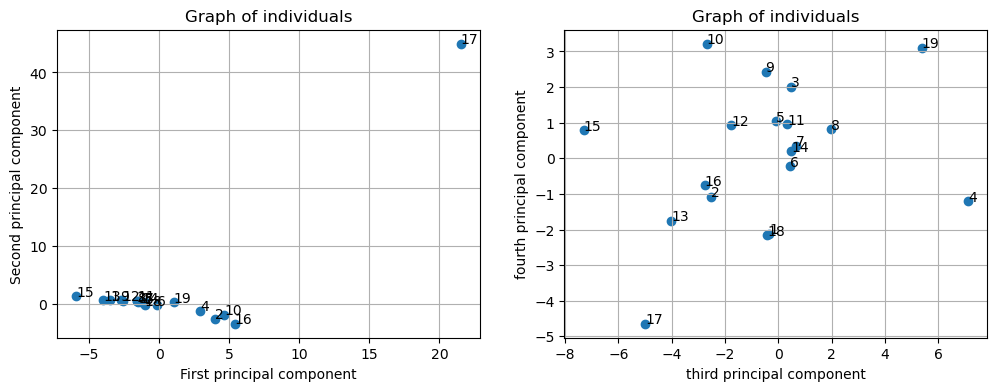

In [86]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
#plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme étiquettes
for i, label in enumerate(labels):
    plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Graph of individuals")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 2], X_pca[:, 3])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme étiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (X_pca[i, 2], X_pca[i, 3]))
plt.xlabel("third principal component")
plt.ylabel("fourth principal component")
plt.title("Graph of individuals")
plt.grid(True)


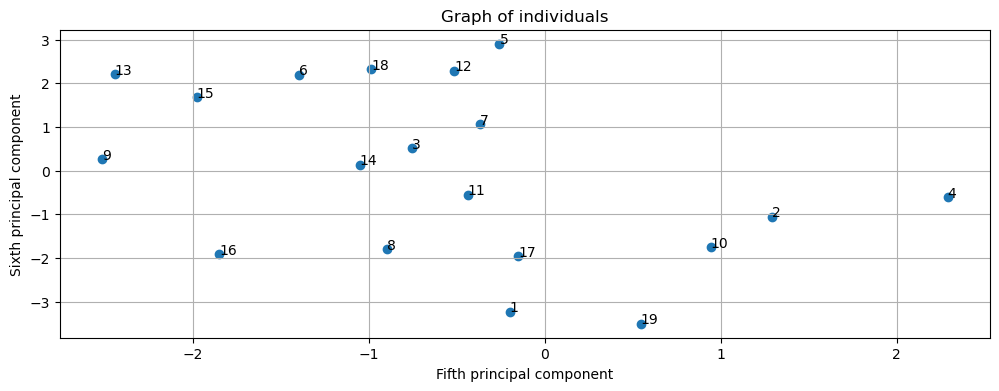

In [61]:
plt.figure(figsize=(12, 4))
plt.scatter(X_pca[:, 4], X_pca[:, 5])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme étiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (X_pca[i, 4], X_pca[i, 5]))
plt.xlabel("Fifth principal component")
plt.ylabel("Sixth principal component")
plt.title("Graph of individuals")
plt.grid(True)

## Prédiction de la sinistralité

### Entrainement du modèle d'autoencodeur

In [180]:
base_AE=base_Edu.select_dtypes(exclude="datetime").drop(columns="unique_learner_id",axis=1)

In [181]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import os

# === 1. Fixer les graines pour la reproductibilité ===
seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# === 2. Préparation des données ===
# Récupérer les colonnes numériques et catégoriques
numerical_cols = base_AE.select_dtypes(include=['int', 'float']).columns
categorical_cols = base_AE.select_dtypes(include=['category', 'object']).columns

# Encodage des variables catégoriques avec OneHotEncoder
oneencoder = OneHotEncoder(sparse_output=False)
encoded_cats = oneencoder.fit_transform(base_AE[categorical_cols])

# Récupérer les noms des colonnes générées par OneHotEncoder
encoded_cat_columns = oneencoder.get_feature_names_out(categorical_cols)

# Centrage et réduction des variables numériques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(base_AE[numerical_cols])

# Fusionner les données encodées et normalisées
final_data = np.hstack([encoded_cats, scaled_nums])

# Concaténer les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0538 - val_loss: 0.0359
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0362 - val_loss: 0.0354
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0356 - val_loss: 0.0349
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0352 - val_loss: 0.0346
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0349 - val_loss: 0.0342
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0345 - val_loss: 0.0340
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0342 - val_loss: 0.0337
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.0338 - val_loss: 0.0334
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.0337 - val_loss: 0.0332
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.0336 - val_loss: 0.0332
Epoch 12/50
547/547 ━━━━━━━━━━

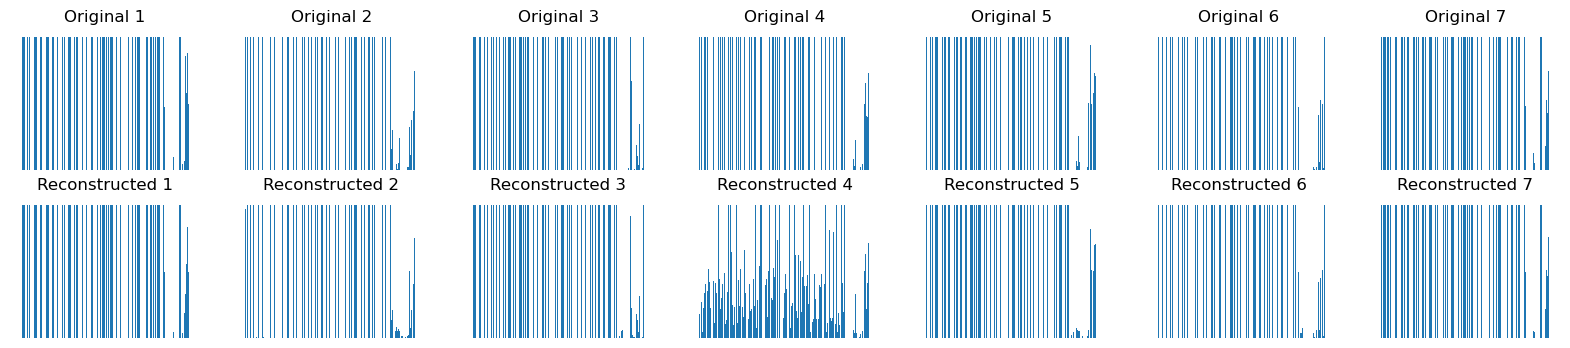

Erreur moyenne de reconstruction : 0.0322


In [182]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test = train_test_split(final_data, test_size=0.3, random_state=seed_value)

# Dimensions de l'entrée
#input_dim = x_train.shape[1]

# === 2. Définition de l'autoencodeur ===
input_dim = x_train.shape[1]  # Assurez-vous que x_train est bien défini
encoding_dim = 3

# Initialisation déterministe des poids
initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

input_img = Input(shape=(input_dim,))
# Encodeur
Hidden1 = Dense(358, activation='relu', kernel_initializer=initializer)(input_img)
#Hidden2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden1)
#Hidden3 = Dense(64, activation='relu', kernel_initializer=initializer)(Hidden2)
encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden1)

# Décodeur
Hidden_output1 = Dense(358, activation='relu', kernel_initializer=initializer)(encoded)
#Hidden_output2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden_output1)
#Hidden_output3 = Dense(256, activation='relu', kernel_initializer=initializer)(Hidden_output2)
decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output1)#Plus touche

# Modèle autoencodeur
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Modèle de l'encodeur seul
encoder = Model(input_img, encoded)

# Représentations encodées (latent space)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# === 4. Visualisation des performances ===
n = 7
plt.figure(figsize=(20, 4))

for i in range(n):
    # Données originales
    ax = plt.subplot(2, n, i + 1)
    plt.bar(range(len(x_test[i])), x_test[i])
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.bar(range(len(decoded_imgs[i])), decoded_imgs[i])
    plt.title(f"Reconstructed {i+1}")
    plt.axis('off')

plt.show()

# Analyse des erreurs de reconstruction
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=1)
print(f"Erreur moyenne de reconstruction : {np.mean(reconstruction_error):.4f}")

### importation de la base ASU


In [183]:
#url = "C:/Users/damso/Documents/data/base_Edu.parquet"
df=pd.read_parquet("C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_assu (2).parquet")
df.head()

,unique_learner_id,learner_id,job_number,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,...,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
0,-5911177134761577615,2032674,5952452787,157,157,195,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
1,8022228279541171063,893514,6956583814,7,8,819,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
2,4508976855497020988,2858364,1547176297,0,-32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2395000730355774468,1362204,3464728867,0,0,376,0,0,0,288,...,0,1,3,0,0,0,0,0,0,0
4,1056703805299986938,1054230,1534163688,64,0,691,0,109,0,156,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# restriction de la base Edu aux variables communes aux bases ASU et EDU
# pour voir les variables qui ne sont pas communes aux deux bases dans la base asu 
columns=[] # contient les colonnes communes aux deux bases 
for column in base_Edu1.columns:
    if column in df.columns:
        columns.append(column)
#base_AE=base_AE[columns]
df.drop(columns, axis=1)


,learner_id,job_number,unique_learner_id_1,days_between_signup_and_first_activity_1,days_between_order_and_first_activity_1,days_between_first_and_last_activities_1,chapter_before_success_count_1,serie_before_success_count_1,quiz_before_success_count_1,theory_activities_total_1,...,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
0,2032674,5952452787,-5911177134761577615,157,157,195,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
1,893514,6956583814,8022228279541171063,7,8,819,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
2,2858364,1547176297,4508976855497020988,0,-32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1362204,3464728867,2395000730355774468,0,0,376,0,0,0,288,...,0,1,3,0,0,0,0,0,0,0
4,1054230,1534163688,1056703805299986938,64,0,691,0,109,0,156,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69393,3793717,2234733812,-872146316430440559,0,0,372,0,57,18,193,...,0,0,0,0,0,0,0,0,0,0
69394,2775978,1784701608,-3415706474168471139,109,109,270,0,50,0,51,...,0,0,0,0,0,0,0,0,0,0
69395,2102507,7135995107,-1958338314080661076,672,665,613,0,93,321,603,...,0,0,0,0,0,0,0,0,0,0
69396,2862021,1866260241,-7394860117143701634,113,114,76,0,0,0,120,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#suppression des colonnes doubles
columns_double=df.drop(columns, axis=1).drop(['learner_id',	'job_number','unique_learner_id_1','var_Assurance0', 'var_Assurance1', 'var_Assurance2', 'var_Assurance3',
       'var_Assurance4', 'var_Assurance5', 'var_Assurance6', 'var_Assurance7',
       'var_Assurance8', 'var_Assurance9', 'var_Assurance10',
       'var_Assurance11', 'var_Assurance12', 'var_Assurance13',
       'var_Assurance14', 'var_Assurance15'],axis=1).columns #colonnes doubles

df=df.drop(columns_double, axis=1)
df.head() #base ASU sans colonnes doubles

,unique_learner_id,learner_id,job_number,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,...,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
0,-5911177134761577615,2032674,5952452787,157,157,195,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
1,8022228279541171063,893514,6956583814,7,8,819,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
2,4508976855497020988,2858364,1547176297,0,-32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2395000730355774468,1362204,3464728867,0,0,376,0,0,0,288,...,0,1,3,0,0,0,0,0,0,0
4,1056703805299986938,1054230,1534163688,64,0,691,0,109,0,156,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df_new[['var_Assurance0', 'var_Assurance1', 'var_Assurance2', 'var_Assurance3',
       'var_Assurance4', 'var_Assurance5', 'var_Assurance6', 'var_Assurance7',
       'var_Assurance8', 'var_Assurance9', 'var_Assurance10',
       'var_Assurance11', 'var_Assurance12', 'var_Assurance13',
       'var_Assurance14', 'var_Assurance15']].describe(include='int')

,var_Assurance0,var_Assurance2,var_Assurance3,var_Assurance4,var_Assurance5,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
count,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0
mean,47.794716,0.006642,0.172747,0.068883,0.002099,0.004798,0.027559,0.282728,0.004018,0.094493,0.0,0.0,0.0,0.0,0.098511
std,29.970804,0.085721,0.46873,0.289709,0.046095,0.072698,0.177506,0.636309,0.06467,0.333834,0.0,0.0,0.0,0.0,0.34161
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,100.0,3.0,5.0,5.0,2.0,3.0,4.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,5.0


In [187]:
# supression des lignes doubles
df = df.drop_duplicates()
df.shape

(66692, 489)

In [188]:
# on supprime les variables qui ont été supprimer dans la base edu, ainsi que les variables inutiles
df_new=df.drop(columns_delete + ["unique_learner_id","learner_id","job_number","first_theory_activity_date",'unique_learner_id_1'], axis=1)


In [ ]:
# traitement des valeurs manquantes
print(df_new.select_dtypes("int").isnull().any().sum()," variables de type int ont des valeurs manquantes")
print(df_new.select_dtypes("float").isnull().any().sum()," variables de type float ont des valeurs manquantes")
print(df_new.select_dtypes("boolean").isnull().any().sum()," variables de type boolean ont des valeurs manquantes")
print(df_new.select_dtypes("datetime").isnull().any().sum()," variables de type datetime ont des valeurs manquantes")

24  variables de type int ont des valeurs manquantes
24  variables de type float ont des valeurs manquantes
253  variables de type boolean ont des valeurs manquantes
0  variables de type datetime ont des valeurs manquantes


In [190]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs booléennes et <NA>
    return col.map(mapping)
colboo=df_new.select_dtypes("boolean").columns
for col in colboo:
    df_new[col] = encode_column_with_na(df_new[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories

In [ ]:
miss_quant=df_new.select_dtypes(include=["int","float"]).isnull().sum()/len(df_new)
miss_quant[miss_quant>0.20].describe() # on ne supprime aucune colonne

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [192]:
#imputation par la médiane
col=df_new.select_dtypes(exclude='category').columns
df_new[col] = df_new[col].fillna(df_new[col].median())

In [193]:
var_assurance=['var_Assurance0', 'var_Assurance1', 'var_Assurance2', 'var_Assurance3',
       'var_Assurance4', 'var_Assurance5', 'var_Assurance6', 'var_Assurance7',
       'var_Assurance8', 'var_Assurance9', 'var_Assurance10',
       'var_Assurance11', 'var_Assurance12', 'var_Assurance13',
       'var_Assurance14', 'var_Assurance15']

### Projection des variables dans l'espace latent

In [198]:
#on duplique l'observation pour qu'il n'y ait pas d'erreur lors de la division des données en données d'entrainement et données de test car la 
# stratification voudrait au moins deux observations par classe
df_duplicate = df_new[df_new["var_Assurance2"]==3]  # Sélection des lignes à dupliquer
df_new = pd.concat([df_new, df_duplicate], ignore_index=True)
df_new.shape

(66693, 380)

In [199]:
# traitement des données de la base ASU en entrée du modèle

X_to_predict= df_new.drop(var_assurance, axis=1)
# Récupérer les colonnes numériques et catégoriques
numerical_cols = X_to_predict.select_dtypes(include=['int', 'float']).columns
categorical_cols = X_to_predict.select_dtypes(include=['category', 'object','boolean']).columns

# Encodage des variables catégoriques avec OneHotEncoder
oneencoder = OneHotEncoder(sparse_output=False)
encoded_cats = oneencoder.fit_transform(X_to_predict[categorical_cols])

# Récupérer les noms des colonnes générées par OneHotEncoder
encoded_cat_columns = oneencoder.get_feature_names_out(categorical_cols)

# Centrage et réduction des variables numériques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(X_to_predict[numerical_cols])

# Fusionner les données encodées et normalisées
final_data = np.hstack([encoded_cats, scaled_nums])

# Concaténer les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

# construction du code latent pour la base ASU, projection dans l'espace latent de l'auto encodeur construit précédemment
encoded_imgs = encoder.predict(final_data)


2085/2085 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


### **Prédiction du risque corporel**

In [ ]:
#construction de la nouvelle base
nom_facteur=["facteur{}".format(i) for i in np.arange(1,4)]
base=df_new.drop(base_AE.columns, axis=1)
base[nom_facteur]=encoded_imgs #construction des facteurs
base.head(20)

,var_Assurance0,var_Assurance1,var_Assurance2,var_Assurance3,var_Assurance4,var_Assurance5,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15,facteur1,facteur2,facteur3
0,80,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.415548,21.419186,31.390768
1,3,1.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.509951,10.637355,34.872349
2,78,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.539669,23.029255,33.702557
3,44,2.00,0,2,0,0,0,1,3,0,0,0,0,0,0,0,-4.133618,17.098064,46.019650
4,91,1.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.750637,23.080462,29.997705
5,70,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.828785,27.665100,41.249203
6,70,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.768085,22.922670,29.477718
7,90,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.476291,19.525482,29.324028
8,63,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.690079,8.404752,10.564485
9,8,2.32,0,1,0,0,0,0,1,0,1,0,0,0,0,1,-0.736852,16.331486,24.741865


In [216]:
base.describe()

,var_Assurance0,var_Assurance1,var_Assurance2,var_Assurance3,var_Assurance4,var_Assurance5,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15,facteur1,facteur2,facteur3
count,66693.0,66693.000000,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.0,66693.000000,66693.000000,66693.000000
mean,47.794716,1.670109,0.006642,0.172747,0.068883,0.002099,0.004798,0.027559,0.282728,0.004018,0.094493,0.0,0.0,0.0,0.0,0.098511,-3.881489,14.335684,28.464781
std,29.970804,0.954074,0.085721,0.46873,0.289709,0.046095,0.072698,0.177506,0.636309,0.06467,0.333834,0.0,0.0,0.0,0.0,0.34161,12.513334,10.655591,14.928879
min,0.0,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-38.460686,-28.201466,-15.426078
25%,21.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.213580,8.012682,15.656869
50%,47.0,1.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.385432,15.699888,32.144325
75%,74.0,2.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.897468,21.787926,39.493568
max,100.0,10.000000,3.0,5.0,5.0,2.0,3.0,4.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,5.0,71.015495,43.406525,58.541462


(0.0, 89.31)

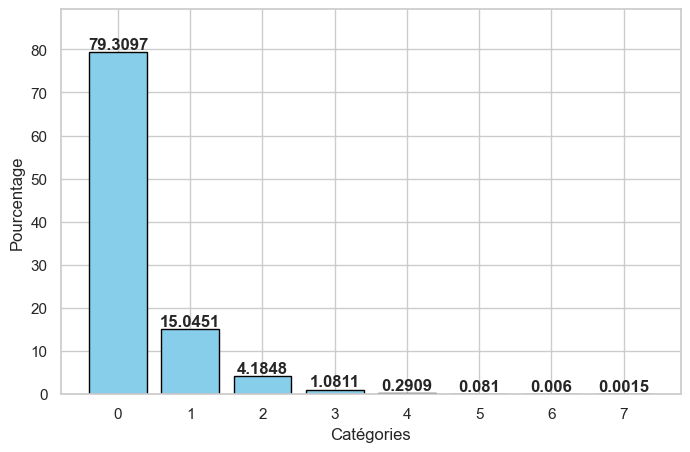

In [211]:
# Définition du style
sns.set_theme(style="whitegrid")

# Création du graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(np.sort(base["var_Assurance8"].unique()), np.round(base["var_Assurance8"].value_counts()/base.shape[0]*100,4), color="skyblue", edgecolor="black")

# Ajout des annotations (valeurs sur les barres)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}", ha="center", va="bottom", fontsize=12, fontweight="bold")

# Personnalisation
plt.xlabel("Catégories")
plt.ylabel("Pourcentage")
#plt.title("Diagramme à bandes annoté")
plt.ylim(0, max(np.round(base["var_Assurance8"].value_counts()/base.shape[0]*100,2)) + 10) 

In [163]:
base["var_Assurance5"].value_counts()

var_Assurance5
0    66554
1      138
2        1
Name: count, dtype: Int64

In [201]:
 # suppression des variables constantes
base=base.drop(["var_Assurance11","var_Assurance12","var_Assurance13","var_Assurance14"],axis=1)

Etant donnée que la variable cible est une variable de comptage, on fera l'hypothèse qu'elle suit une loi discrète classique. 

In [148]:
df_new["var_Assurance10"].mean()

0.09449267539321968

In [149]:
df_new["var_Assurance10"].var()

0.11144525819696409

In [206]:
base.to_csv("C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/bas_glm.csv", index=False,header=True,sep=";")

Etant donnée que la différence entre la moyenne et la variance de cette variable est négligeable (pas de surdispersion), nous allons considéré une distribution de poisson avec une fonction de lien logarithmique pour le modèle linéaire généralisé. 

### Implémentation d'un GLM poisson

In [ ]:
# les variables var_assurance11 ... var_assurance14 sont constantes et ne contiennent que des 0
bodily=base["var_Assurance2"]
material=base["var_Assurance3"]
base=base.drop(["var_Assurance2","var_Assurance3"],axis=1)
base=base.drop(["var_Assurance2"],axis=1)
base = base.astype(np.float64)
#base = np.asarray(base, dtype=np.float64)


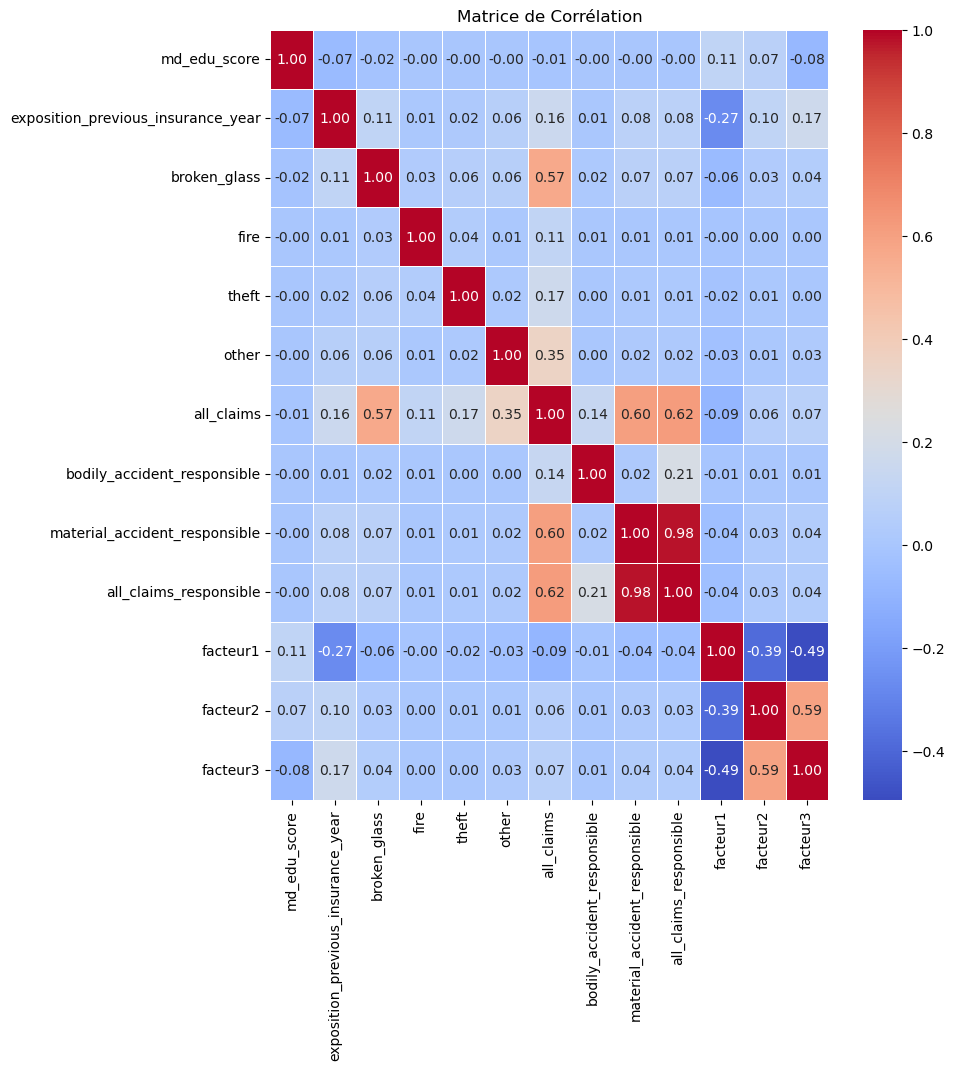

In [160]:
base_corr=base
base_corr.columns=["md_edu_score","exposition_previous_insurance_year","broken_glass","fire","theft","other","all_claims","bodily_accident_responsible","material_accident_responsible","all_claims_responsible","facteur1","facteur2","facteur3"]
corr_matrix=base_corr.corr()
import seaborn as sns
plt.figure(figsize=(9,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

La variable var_Assurance15 (all_claims_responsible) est tres fortement correlée avec la variable var_Assurance10("material_accident_responsible") ce qui pourrait entrainer un problème de multicolinéarité dans le modèle. Aussi, la variable var_assurance8 est corréleé avec plusieurs variables. Analysons le VIF pour confirmer le fait que ces variables vont entrainer une forte colinéarité dans le modèle.

In [549]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calcul des VIF
print(compute_vif(base))

c:\Users\lisaw\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           Variable       VIF
0    var_Assurance0  2.566259
1    var_Assurance1  3.312197
2    var_Assurance4  2.168289
3    var_Assurance5  1.033903
4    var_Assurance6  1.072066
5    var_Assurance7  1.416430
6    var_Assurance8  5.110304
7    var_Assurance9       inf
8   var_Assurance10       inf
9   var_Assurance15       inf
10         facteur1  1.234241
11         facteur2  2.166556
12         facteur3  3.448045


Un VIF= infini signifie que la variable est parfaitement corrélée avec une ou plusieurs autres variables. un VIF >5 suggère l'existence d'une forte multicolinéarité. On va donc supprimer les variables var_assurance15 et var_assurance8.

In [141]:
base=base.drop(["var_Assurance15","var_Assurance8"], axis=1)

In [551]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calcul des VIF
print(compute_vif(base))

           Variable       VIF
0    var_Assurance0  2.565425
1    var_Assurance1  3.286015
2    var_Assurance4  1.082060
3    var_Assurance5  1.004473
4    var_Assurance6  1.009719
5    var_Assurance7  1.032190
6    var_Assurance9  1.004634
7   var_Assurance10  1.092824
8          facteur1  1.234219
9          facteur2  2.165971
10         facteur3  3.446533


In [ ]:
Après suppression de ces variables, on a plus de problèmes de multicolinéarité forte.

In [203]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(base, bodily, test_size=0.3, stratify=bodily, random_state=40)
#x_train = scaler.fit_transform(x_train)
y_train.value_counts()

var_Assurance2
0    46391
1      279
2       13
3        2
Name: count, dtype: Int64

In [439]:
#from sklearn.model_selection import StratifiedShuffleSplit
# Création du split en respectant les proportions des classes
#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#for train_index, test_index in sss.split(base, bodily):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

 #Vérification de la distribution des classes
#print(y_train.value_counts(normalize=True))
#print(y_test.value_counts(normalize=True))

c:\Users\lisaw\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
c:\Users\lisaw\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
c:\Users\lisaw\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))


Optimization terminated successfully.
         Current function value: nan
         Iterations 2
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                    var_Assurance2   No. Observations:                46685
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                    46683
Method:                                      MLE   Df Model:                            1
Date:                           Fri, 04 Apr 2025   Pseudo R-squ.:                     nan
Time:                                   17:33:29   Log-Likelihood:                    nan
converged:                                  True   LL-Null:                       -1848.6
Covariance Type:                       nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const      

In [553]:
# suppression des variables une à une pour voir si l'on peut améliorer le modèle
import statsmodels.api as sm
deviance_glm_poisson=[]
for col in x_train.columns:
    glm_poisson = sm.GLM(np.asarray(y_train), np.asarray(sm.add_constant(x_train.drop(col,axis=1))), family=sm.families.Poisson()).fit()
    deviance_glm_poisson.append(round(glm_poisson.deviance,2))
deviance_glm_poisson

[1704.08,
 1722.75,
 1715.18,
 1705.31,
 1704.11,
 1707.76,
 3100.72,
 1714.9,
 1705.71,
 1708.06,
 1734.6]

On constate qu'en partant du modèle complet, aucune variable ne semble détériorer le modèle. On va donc retenir toutes ces variables pour la suite.

In [96]:
import statsmodels.api as sm
glm_poisson = sm.GLM(np.asarray(y_train), np.asarray(sm.add_constant(x_train[["facteur1","facteur2","facteur3"]])), family=sm.families.NegativeBinomial(alpha=1)).fit()
print(glm_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                46685
Model:                            GLM   Df Residuals:                    46681
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1867.8
Date:                Wed, 02 Apr 2025   Deviance:                       2903.5
Time:                        22:04:00   Pearson chi2:                 5.21e+04
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0001173
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0069      0.132    -38.029      0.0

In [97]:
# prédiction
#x_test = sm.add_constant(x_test)
pred_sinistres = glm_poisson.predict(sm.add_constant(x_test[["facteur1","facteur2","facteur3"]]))

In [541]:
# calcul de la déviance sur les données de test
epsilon = 1e-10  # Pour éviter log(0)
deviance = 2 * np.sum(y_test * np.log((y_test + epsilon) / (pred_sinistres + epsilon)) - (y_test - pred_sinistres))
deviance

730.9509414861565

<Figure size 600x1000 with 0 Axes>

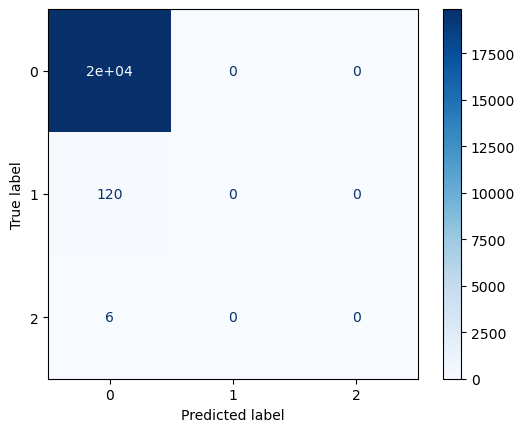

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(6,10))
cm = confusion_matrix(y_test, np.round(pred_sinistres))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
# pip install pygam
from pygam import PoissonGAM, s
gam = PoissonGAM().fit(x_train[["facteur1","facteur2","facteur3"]], y_train)
print(gam.summary())
#y_pred = gam.predict(X_test)

c:\Users\lisaw\anaconda3\Lib\site-packages\pygam\pygam.py:2873: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()


PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     25.4416
Link Function:                          LogLink Log Likelihood:                                 -1860.6696
Number of Samples:                        46685 AIC:                                             3772.2225
                                                AICc:                                            3772.2536
                                                UBRE:                                               2.0684
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0136
Feature Function                  Lam

C:\Users\lisaw\AppData\Local\Temp\ipykernel_6964\2719014053.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [204]:
gam_train=x_train
y_train_m = y_train_m.astype('int64')
gam_train["corporel"]=y_train
#gam_train["materiel"]=x_train["var_Assurance4"]
gam_test=x_test
gam_test["corporel"]=y_test
#gam_test["materiel"]=x_test["var_Assurance4"]
gam_train.to_csv("C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/base_gam_train.csv", index=False,header=True,sep=";")
gam_test.to_csv("C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/base_gam_test.csv", index=False,header=True,sep=";")

In [108]:
base["var_Assurance4"].value_counts()

var_Assurance4
0.0    62666
1.0     3539
2.0      422
3.0       54
4.0       11
5.0        1
Name: count, dtype: int64

### GLM avec XGBOOST

In [567]:
## ESSAI D'un GLM boosté
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor

xgb = XGBRegressor(max_depth=1, objective='count:poisson')
xgb.fit(x_train, y_train)

y_pred_boosted = xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred_boosted)
print(f"Mean Squared Error (MSE) : {mse}")

Mean Squared Error (MSE) : 1.7623430512030957e-08


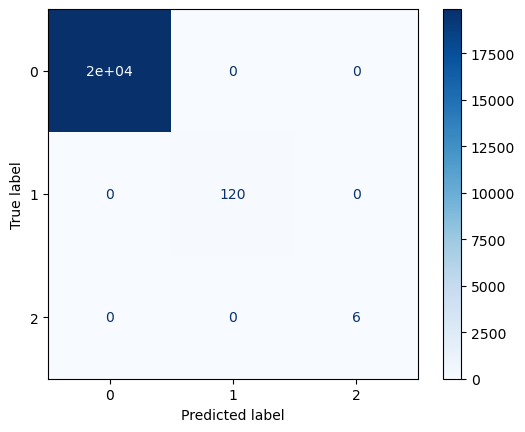

In [568]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(y_pred_boosted))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.frame import H2OFrame

# Initialisation de H2O
h2o.init()
x_train["nb_sinistres"]=y_train
x_test["nb_sinistres"]=y_test
# Conversion des données en format H2O
train_h2o = H2OFrame(x_train)
test_h2o = H2OFrame(x_test)

# Définition du modèle de Gradient Boosting avec une fonction de lien GLM (Poisson par ex.)
gbm_glm = H2OGradientBoostingEstimator(distribution="poisson",
                                       ntrees=200,
                                       learn_rate=0.1,
                                       max_depth=3)

# Entraînement du modèle
gbm_glm.train(x=list(x_train.columns), y="nb_sinistres", training_frame=train_h2o)

# Prédictions
predictions = gbm_glm.predict(test_h2o)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE) : {mse}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 day 23 hours 45 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 27 days
H2O_cluster_name:,H2O_from_python_lisaw_3h5qh6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.390 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\Users\lisaw\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


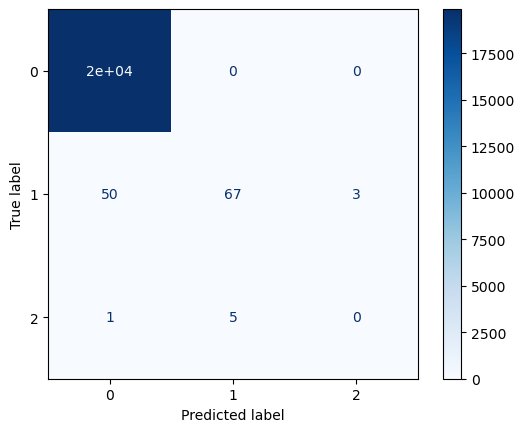

In [564]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(predictions.as_data_frame().values.flatten()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [581]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Définition du modèle de base : GLM Poisson
glm_base = PoissonRegressor()

# Application d'AdaBoost.R2 avec le GLM Poisson comme estimateur de base
adaboost_glm = AdaBoostRegressor(estimator=glm_base, n_estimators=10, learning_rate=0.2,random_state=42)
adaboost_glm.fit(pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns), y_train)

# Prédictions
y_pred = adaboost_glm.predict(x_test)

# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) : {mse}")

Mean Squared Error (MSE) : 0.007442439135873882


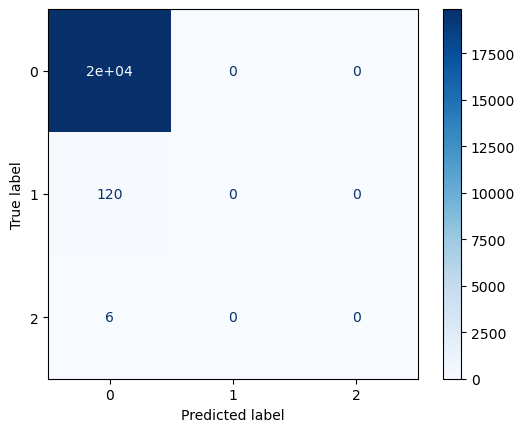

In [582]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

### Utilisation des GLM avec le rééchantillonage SMOTE

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
#Création du split en respectant les proportions des classes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(base, bodily):
    X_train, X_test = base.iloc[train_index], base.iloc[test_index]
    y_train, y_test = bodily.iloc[train_index], bodily.iloc[test_index]

#Vérification de la distribution des classes
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

var_Assurance2
0    0.993702
1    0.005979
2    0.000281
3    0.000037
Name: proportion, dtype: Float64
var_Assurance2
0    0.993703
1    0.005997
2      0.0003
Name: proportion, dtype: Float64


### ACTUARIAL NEURONAL NETWORK

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_train_scaled = x_train_scaled.astype('float32')
x_test_scaled = x_test_scaled.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# Définition du modèle de réseau de neurones
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(x_train_scaled.shape[1],)),  # Première couche cachée
    layers.Dense(32, activation="relu"),  # Deuxième couche cachée
    layers.Dense(1, activation="exponential")  # Sortie avec activation exponentielle (Poisson)
])

# Compilation du modèle avec une fonction de perte adaptée à la sinistralité
model.compile(optimizer="adam", loss=tf.keras.losses.Poisson(), metrics=["mae"])

# Entraînement du modèle
model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test))

# Prédiction sur les données de test
y_pred = model.predict(x_test_scaled)

Epoch 1/100


c:\Users\lisaw\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1459/1459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0931 - mae: 0.0742 - val_loss: 0.0206 - val_mae: 0.0075
Epoch 2/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0212 - mae: 0.0063 - val_loss: 0.0203 - val_mae: 0.0071
Epoch 3/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0208 - mae: 0.0057 - val_loss: 0.0202 - val_mae: 0.0070
Epoch 4/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0208 - mae: 0.0055 - val_loss: 0.0200 - val_mae: 0.0066
Epoch 5/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0207 - mae: 0.0054 - val_loss: 0.0200 - val_mae: 0.0067
Epoch 6/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0207 - mae: 0.0053 - val_loss: 0.0199 - val_mae: 0.0066
Epoch 7/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0206 - mae: 0.0053 - val_loss: 0.0198 - val_mae: 0.0066
Epoch 8/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0206 - mae: 0.0053 - val_loss: 0.0198 - val_mae: 0.0065
Epoch 9/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3

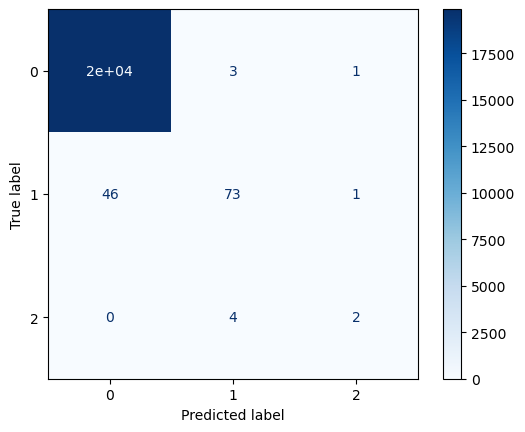

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

### **Prédiction du risque matériel** 

In [ ]:
## il semble mieux d'utiliser une loi binomiale négative pour cette variable

In [69]:
# Diviser les données en ensembles d'entraînement et de test
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(base, material, test_size=0.3, stratify=material, random_state=40)
#x_train = scaler.fit_transform(x_train)
y_train_m.value_counts()

var_Assurance3
0    40117
1     5326
2     1023
3      189
4       24
5        6
Name: count, dtype: Int64

In [597]:
# suppression des variables une à une pour voir si l'on peut améliorer le modèle
import statsmodels.api as sm
deviance_glm_poisson=[]
for col in x_train_m.columns:
    glm_poisson = sm.GLM(np.asarray(y_train_m), np.asarray(sm.add_constant(x_train_m.drop(col,axis=1))), family=sm.families.Poisson()).fit()
    deviance_glm_poisson.append(round(glm_poisson.deviance,2))
deviance_glm_poisson

[20600.48,
 20917.77,
 20697.53,
 20612.5,
 20599.47,
 20631.76,
 20603.75,
 31399.76,
 20607.79,
 20600.32,
 20605.04]

In [612]:
glm_poisson = sm.GLM(np.asarray(y_train_m), np.asarray(sm.add_constant(x_train_m)), family=sm.families.Poisson()).fit()
print(glm_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                46685
Model:                            GLM   Df Residuals:                    46673
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17294.
Date:                Sat, 29 Mar 2025   Deviance:                       20597.
Time:                        21:55:30   Pearson chi2:                 3.77e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2295
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7690      0.041    -67.071      0.0

In [613]:
pred_sinistres = glm_poisson.predict(sm.add_constant(x_test_m))

<Figure size 600x1000 with 0 Axes>

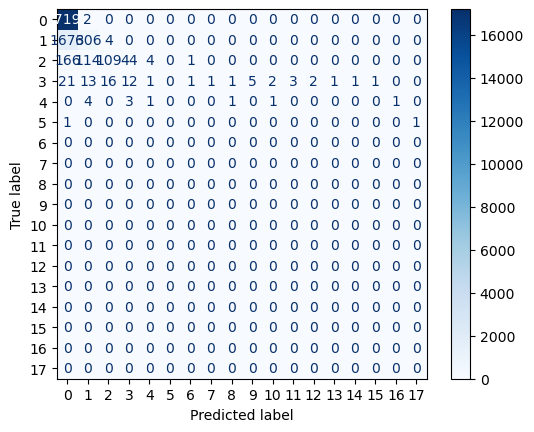

In [614]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(6,10))
cm = confusion_matrix(y_test_m, np.round(pred_sinistres))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [640]:
## ESSAI D'un GLM boosté
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor

xgb = XGBRegressor(max_depth=5, objective='count:poisson')
xgb.fit(x_train_m, y_train_m)

y_pred_boosted = xgb.predict(x_test_m)
mse = mean_squared_error(y_test_m, y_pred_boosted)
print(f"Mean Squared Error (MSE) : {mse}")

Mean Squared Error (MSE) : 0.08971501776943283


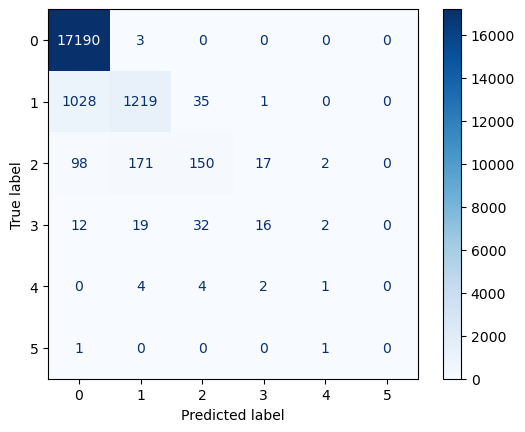

In [641]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_m, np.round(y_pred_boosted))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

### GLM avec SMOTE

In [646]:
# Application de SMOTE sur les données d'entraînement
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={2: 5000, 3: 3000, 4:3000, 5:2000}, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_m, y_train_m)

In [661]:
from xgboost import XGBRegressor
from sklearn.linear_model import PoissonRegressor

xgb = XGBRegressor(max_depth=5, objective='count:poisson')
xgb.fit(X_resampled, y_resampled)

y_pred_boosted = xgb.predict(x_test_m)
mse = mean_squared_error(y_test_m, y_pred_boosted)
print(f"Mean Squared Error (MSE) : {mse}")

Mean Squared Error (MSE) : 0.10297267678533864


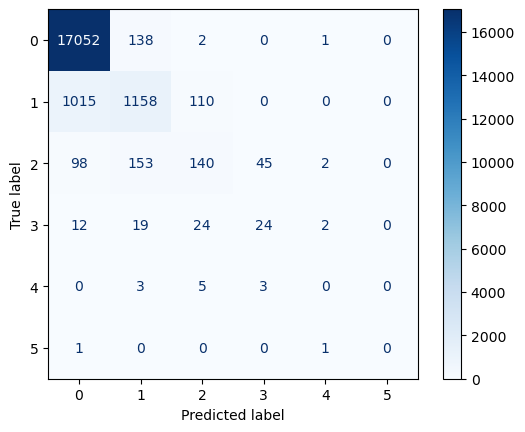

In [662]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_m, np.round(y_pred_boosted))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [651]:
y_train_m.value_counts()

var_Assurance3
0    40117
1     5326
2     1023
3      189
4       24
5        6
Name: count, dtype: Int64

In [660]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# SMOTE pour suréchantillonner les classes minoritaires
smote = SMOTE(sampling_strategy={1: 7000, 2: 4000,3:3000,4:2000,5:1000}, random_state=42)

# Downsampling de la classe majoritaire pour équilibrer le tout
undersample = RandomUnderSampler(sampling_strategy={0: 25000}, random_state=42)

# Pipeline combinant SMOTE + UnderSampling
pipeline = Pipeline([('smote', smote), ('undersample', undersample)])

# Application du pipeline
X_resampled, y_resampled = pipeline.fit_resample(x_train_m, y_train_m)

In [ ]:
# modélisation avec une loi binomiale négative

model = sm.GLM(np.asarray(y_train_m), np.asarray(sm.add_constant(x_train_m)), family=sm.families.NegativeBinomial(alpha=1)).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                46685
Model:                            GLM   Df Residuals:                    46673
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1102.6
Date:                Sun, 30 Mar 2025   Deviance:                       1373.1
Time:                        23:50:53   Pearson chi2:                 4.62e+04
No. Iterations:                    10   Pseudo R-squ. (CS):            0.03236
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2718      0.238    -26.339      0.0

In [606]:
pred_sinistres = model.predict(sm.add_constant(x_test_m))

<Figure size 3000x1600 with 0 Axes>

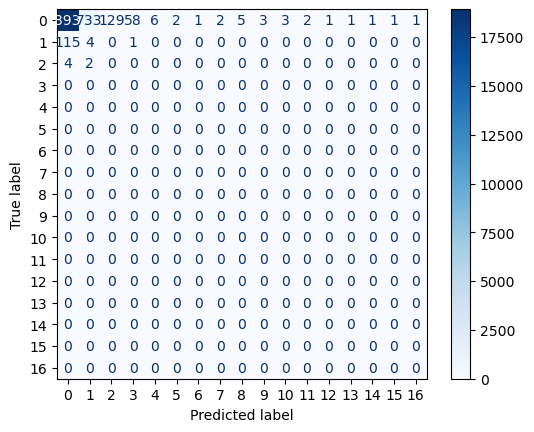

In [664]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,16))
cm = confusion_matrix(y_test, np.round(pred_sinistres))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x_train_m_scaled = scaler.fit_transform(x_train_m)
x_test_m_scaled = scaler.fit_transform(x_test_m)
x_train_m_scaled = x_train_m_scaled.astype('float32')
x_test_m_scaled = x_test_m_scaled.astype('float32')
y_train_m = y_train_m.astype('float32')
y_test_m = y_test_m.astype('float32')
# Définition du modèle de réseau de neurones
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(x_train_m_scaled.shape[1],)),  # Première couche cachée
    layers.Dense(32, activation="relu"),  # Deuxième couche cachée
    layers.Dense(1, activation="exponential")  # Sortie avec activation exponentielle (Poisson)
])

# Compilation du modèle avec une fonction de perte adaptée à la sinistralité
model.compile(optimizer="adam", loss=tf.keras.losses.Poisson(), metrics=["mae"])

# Entraînement du modèle
model.fit(x_train_m_scaled, y_train_m, epochs=100, batch_size=32, validation_data=(x_test_m_scaled, y_test_m))

# Prédiction sur les données de test
y_pred = model.predict(x_test_m_scaled)

Epoch 1/100


c:\Users\lisaw\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1459/1459 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4185 - mae: 0.2674 - val_loss: 0.3113 - val_mae: 0.1185
Epoch 2/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3093 - mae: 0.1468 - val_loss: 0.3098 - val_mae: 0.1154
Epoch 3/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3085 - mae: 0.1454 - val_loss: 0.3089 - val_mae: 0.1145
Epoch 4/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3082 - mae: 0.1449 - val_loss: 0.3082 - val_mae: 0.1146
Epoch 5/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3078 - mae: 0.1446 - val_loss: 0.3076 - val_mae: 0.1150
Epoch 6/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3076 - mae: 0.1445 - val_loss: 0.3073 - val_mae: 0.1154
Epoch 7/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3073 - mae: 0.1444 - val_loss: 0.3071 - val_mae: 0.1157
Epoch 8/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3072 - mae: 0.1444 - val_loss: 0.3070 - val_mae: 0.1159
Epoch 9/100
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 3

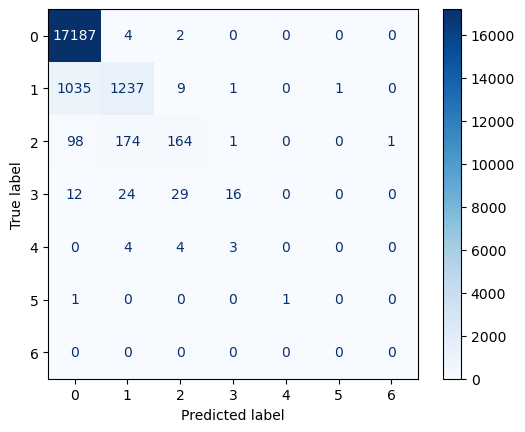

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_m, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()